**Group - 21**
1. Aimilios Petroulas - 03743395
2. Mohammed Anas Ejjalili - 03735491
3. Gayatri Kudchadker - 03709002
4. Leela Sai Prabhat Reddy Kondamadugula - 03708633
5. Selin Kesler - 03694002


# **Task I**

Let $\mathbf{C}_d = \{\mathbf{x}\in \mathbb{R}^p\mid\|\mathbf{x}\|_\infty\leq\frac{d}{2}\}$ denote the $p$-dimensional hypercube of edge length $d$, centered at the origin.
#### **Part 1**
Assume $\mathbf{X}$ to be uniformly distributed in $\mathbf{C}_1$. Determine $d$ in dependence of $p$ and $q\in[0, 1]$, such that
$$Pr(\mathbf{X}\in\mathbf{C}_d)=q$$
holds.



#### Solution : 

X is uniformly distributed in $\mathbf{C}_1$

$$Pr(\mathbf{X}\in\mathbf{C}_1)=q$$



$\int_{-1/2}^{1/2}$$\int_{-1/2}^{1/2}$....$\int_{-1/2}^{1/2}$$\int_{-1/2}^{1/2}\mathbf{dx}_1\mathbf{dx}_2......\mathbf{dx}_p$ = q

Therefore, and given that

$$Pr(\mathbf{X}\in\mathbf{C}_d)=q$$

$\int_{-d/2}^{d/2}$$\int_{-d/2}^{d/2}$....$\int_{-d/2}^{d/2}$$\int_{-d/2}^{d/2}\mathbf{dx}_1\mathbf{dx}_2......\mathbf{dx}_p$ = q

Thus, it can be shown that <br>
  $d^{p}={q}$


Hence,

${d}=\sqrt[p]{q}$

#### **Part  2**
Let the components of the $p$-dimensional random variable $\mathbf{X}^p$ be independent and have the standard normal distribution. It is known that $Pr(|\mathbf{X}^1|\leq2.576)=0.99$. For an arbitrary $p$, determine the probability $Pr(\|\mathbf{X}^p\|_\infty\gt2.576)$ for any of the components of $\mathbf{X}^p$ to lie outside of the interval $[-2.576, 2.576]$. Evaluate the value for $p = 2$, $p = 3$ and $p = 500$.

#### Solution :  

   \begin{equation}
    \textbf{Given:} \; 𝑃𝑟(|𝐗^1| ≤ 2.576) = 0.99 \\
   \end{equation}
   Then it follows that,
    \begin{equation}
      𝑃𝑟(‖𝐗^𝑝‖_∞ ≤ 2.576) = (0.99)^{p} \\
      𝑃𝑟(‖𝐗^𝑝‖_∞ > 2.576) = 1 - 𝑃𝑟(‖𝐗^𝑝‖_∞ ≤ 2.576)\ = 1 -(0.99)^{p} \\
      \textbf{For p = 2:} \; 𝑃𝑟(‖𝐗^2‖_∞ > 2.576) = 1 - (0.99)^{2} = 0.0199 \\
      \textbf{For p = 3:} \; 𝑃𝑟(‖𝐗^3‖_∞ > 2.576) = 1 - (0.99)^{3} = 0.0297 \\
      \textbf{For p = 500:} \; 𝑃𝑟(‖𝐗^{500}‖_∞ > 2.576) = 1 - (0.99)^{500} = 0.9934
    \end{equation}
   

# **Task II**

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

**Part 1**

Sample 100 uniformly distributed random vectors from the box $[-1, 1]^{d}$ for d = 2

In [ ]:
# generates a matrix of 100 vectors of dimension 2 with values between [-1,1]
mat = np.random.uniform(low=-1,high=1,size=(100, 2))
print("Dimension: " + str(mat.shape))

Dimension: (100, 2)


**Part 2**

For each of the 100 vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors $\mathbf{x}$, $\mathbf{y}$ the cosine of the angle between the two vectors is defined as

$$\cos{((\mathbf{x}, \mathbf{y}))} = \frac{\langle \mathbf{x}, \mathbf{y} \rangle}{\|\mathbf{x}\|\|\mathbf{y}\|}.$$

In [ ]:
def find_mean_min_angle(dimension):
  """
  Input: dimension -> vector dimension
  Return: average of minimum angles between a vector to all other vectors
  """
  # generate a matrix of 100 vetors of given dimension
  mat = np.random.uniform(low=-1,high=1,size=(100, dimension))
  # Find A * A.T
  dot_product = np.dot(mat, mat.transpose())  # shape N X N 
  # L2-norm of each vector
  euc_norm_row = np.linalg.norm(mat, axis=1)  # shape (N,)
  # divide the dot products by the norms
  # this can be done by diving the matrix rowwise and columnwise by the euclidean norm (broadcast row and column wise)
  cosines = (dot_product / euc_norm_row ) / (euc_norm_row.reshape(-1, 1))
  # find inverse of cosines to get the actual angle
  # we need to clip the cosines to be in range [-1, 1] due to floating point precision
  angles = np.arccos(np.clip(cosines, -1, 1)) #same shape as cosines
  # diagonal values should not be considered since they are angles between a vector and itself
  # Thus, the diagonal elements will be 0. We will replace the values with maximum value in each row
  np.fill_diagonal(angles, np.max(angles, axis=1))
  # Find minimum angle in each row and return average
  mean_min_angle = np.mean(np.min(angles, axis=1))
  return mean_min_angle

# Mean of Minimum angle for dimension = 2
print("Average Minimum Angle for Dimension = 2 is " + str(find_mean_min_angle(2)))

Average Minimum Angle for Dimension = 2 is 0.03174586315980854


**Part 3**

Repeat the above for dimensions d = 1, ..., 1000 and use the results to plot the average minimum angle against the dimension.

Text(0, 0.5, 'Average Minimum Angles')

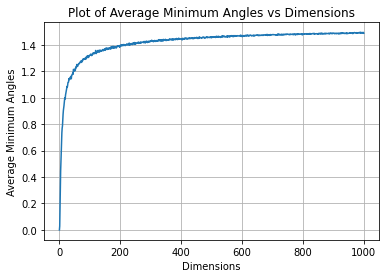

In [ ]:
# iterate over all dimensions and generate average of minimum angles
averages = []
for i in range(1, 1001):
  averages.append(np.round(find_mean_min_angle(i), 4))

plt.grid()
plt.plot(np.array(range(0, 1000))+1, averages)
plt.title("Plot of Average Minimum Angles vs Dimensions")
plt.xlabel("Dimensions")
plt.ylabel("Average Minimum Angles (Radians)")


#### **Part 4**
Give an interpretation of the result. What conclusion can you draw for $2$ randomly sampled vectors in a $d$-dimensional space?

#### Solution:

The above result can be interpreted as follows:

- As the dimension increases, the angle between two vectors sampled randomly tends to increase.

- The minimum angle can be seen converging to $\frac{\pi}{2}$ as the dimension increases. It means the two randomly sampled vectors are orthogonal to each other in $d$-dimensional space where $d>>n$.

- The sampled vectors become equidistant as the dimension increases and as the randomly sampled vector becomes equidistant, classifiers like $k$-nearest neighbour cannot be used to classify them.

- Convergence to $\frac{\pi}{2}$ implies that most samples being concentrated in the 'corners' of the cube. This implies that most of the space is occupied by the corners.

#### **Part 5**
Does the result change if the sample size increases?

In [ ]:
# for varying sample size 

def find_mean_min_angle(dimension, sample_size):
  """
  Input: dimension -> vector dimension
  Return: average of minimum angles between a vector to all other vectors
  """
  # generate a matrix of 100 vetors of given dimension
  mat = np.random.uniform(low=-1,high=1,size=(sample_size, dimension))
  # Find A * A.T
  dot_product = np.dot(mat, mat.transpose())  # shape N X N 
  # L2-norm of each vector
  euc_norm_row = np.linalg.norm(mat, axis=1)  # shape (N,)
  # divide the dot products by the norms
  # this can be done by diving the matrix rowwise and columnwise by the euclidean norm (broadcast row and column wise)
  cosines = (dot_product / euc_norm_row ) / (euc_norm_row.reshape(-1, 1))
  # find inverse of cosines to get the actual angle
  # we need to clip the cosines to be in range [-1, 1] due to floating point precision
  angles = np.arccos(np.clip(cosines, -1, 1)) #same shape as cosines
  # diagonal values should not be considered since they are angles between a vector and itself
  # Thus, the diagonal elements will be 0. We will replace the values with maximum value in each row
  np.fill_diagonal(angles, np.max(angles, axis=1))
  # Find minimum angle in each row and return average
  mean_min_angle = np.mean(np.min(angles, axis=1))


  return mean_min_angle





We see that there is a decrease in the average minimum angle value with  increase in the sample size.

Cosine distance is a good measuring the similarity between vectors as it is ranged between -1 and 1 by definition. 

* -1 would mean that two vectors are exactly opposite
*  1 would mean that two vectors are exactly the same
* 0 indicates the  orthogonality or decorrelation
* in-between values indicate intermediate similarity or dissimilarity.


As the d-dimensions increase, it is seen that the mean value of the cosine distance to all other vectors decreases and approxiamates to 0. 

In addition to that, increasing sample size leads cosine-distance to get closer to 0 as increasing sample size reduces the possibility of random correlations between samples. 

<Figure size 432x432 with 0 Axes>

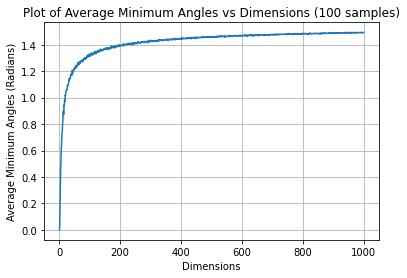

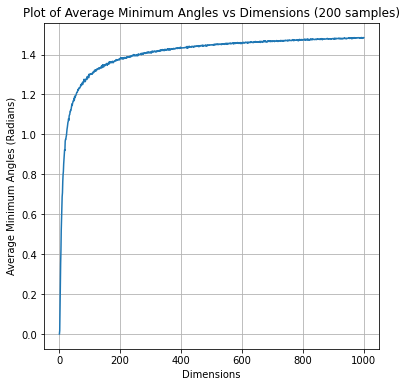

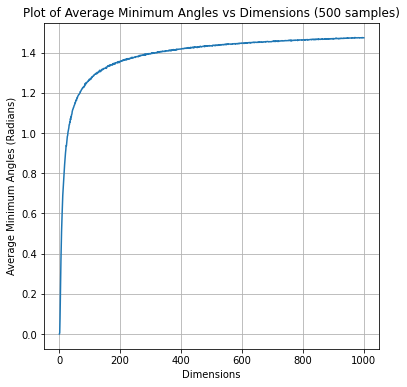

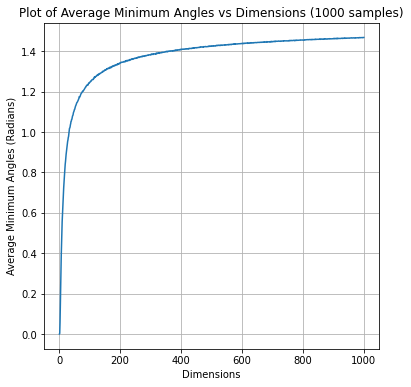

<Figure size 432x432 with 0 Axes>

In [ ]:
# for varying sample size and dimensions 


# iterate over all dimensions and generate average of minimum angles
averages_100 = []
averages_200 = []
averages_500 = []
averages_1000 = []
averages_10000 = []

sample_size_array = [100,200,500,1000,10000]

for i in range(1, 1001):
  averages_100.append(np.round(find_mean_min_angle(i,100), 4))

plt.grid()
plt.plot(np.array(range(0, 1000))+1, averages_100)
# plt.xlim(2, 1000)
plt.title("Plot of Average Minimum Angles vs Dimensions (100 samples)")
plt.xlabel("Dimensions")
plt.ylabel("Average Minimum Angles (Radians)")
plt.figure(figsize=(6, 6))

for i in range(1, 1001):
  averages_200.append(np.round(find_mean_min_angle(i,200), 4))
plt.grid()
plt.plot(np.array(range(0, 1000))+1, averages_200)
plt.title("Plot of Average Minimum Angles vs Dimensions (200 samples)")
plt.xlabel("Dimensions")
plt.ylabel("Average Minimum Angles (Radians)")
plt.figure(figsize=(6, 6))

for i in range(1, 1001):
  averages_500.append(np.round(find_mean_min_angle(i,500), 4))
plt.grid()
plt.plot(np.array(range(0, 1000))+1, averages_500)
plt.title("Plot of Average Minimum Angles vs Dimensions (500 samples)")
plt.xlabel("Dimensions")
plt.ylabel("Average Minimum Angles (Radians)")
plt.figure(figsize=(6, 6))

for i in range(1, 1001):
  averages_1000.append(np.round(find_mean_min_angle(i,1000), 4))
plt.grid()
plt.plot(np.array(range(0, 1000))+1, averages_1000)
plt.title("Plot of Average Minimum Angles vs Dimensions (1000 samples)")
plt.xlabel("Dimensions")
plt.ylabel("Average Minimum Angles (Radians)")
plt.figure(figsize=(6, 6))

# for i in range(1, 1001):
  # averages_10000.append(np.round(find_mean_min_angle(i,10000), 4))


When we change the sample size, the slope changes slightly but as the dimensions increases, it becomes less significant. We feel the reason for this is that the sample becomes less relevant as the dimensionality increase and thus relates to the *curse of dimensionality*, where the increase in dimensions dissipates the 'relationship' between the samples.

# **Task 3:**


*  Yes, it's a probability table:  
$\sum P(X,y) = 0.4 +0.14+0.05+0.02+0.26+0.13 = \underline{\underline{1}}$ 


*  $$E_{Y|X=2}[Y] = \sum Y \cdot P(Y|X=2) = \sum Y \cdot \frac{P(Y,X=2)}{P(X=2)} = 1*\frac{0,4}{0,59} + 2*\frac{0,14}{0,59} + 3*\frac{0,05}{0,59} = \underline{\underline{1,4}}$$


* $$P(X = 1,Y = 3) = P(Y)P(X=1|Y=3) \Rightarrow P(X=1|Y=3) = \frac{P(X = 1,Y = 3)}{P(Y=3)}  = \frac{0,13}{0,18} = \underline{\underline{0,72}} $$


*   $$P(x,y \in R) = \int_{R}f(x,y)dxdy = \int_{0}^{1}\int_{0}^{1/2}1dxdy =  \int_{0}^{1}[y]_{0}^{1/2} dx= \int_{0}^{1} 1/2 dx = [x/2]_{0}^{1}= 1/2 \neq 1$$ $\Rightarrow$ not a joint density function 


 
*   $$ f_x(X) = \int_{0}^{\infty}f(x,y)dy = \int_{0}^{\infty}2e^{-(x+y)}dy = \int_{0}^{\infty} (-2e^{-x-y})'dy = 0 - (-2e^{-x}) = \underline{\underline{2e^{-x}}} $$

$$ f_y(Y) = \int_{0}^{y}2e^{-(x+y)}dx = \int_{0}^{y}(-2e^{-x-y})'dx = -2e^{-y-y} + 2e^{-y} = \underline{\underline{2e^{-y}(1-e^{-y})}} $$


* $$ P(X \leq 2|Y = 1/2) = \frac{P(X \leq 2,Y = 1/2)}{P(Y = 1/2)} $$
$$ \Rightarrow P(X \leq 2,Y = 1/2) = \int_{0}^{2}\frac{2x+2}{15}dx = \underline{\underline{0,53}} $$
$$ \Rightarrow P(Y = 1/2) = \int_{0}^{3}\frac{2x+2}{15}dx = \underline{\underline{1}}$$
$$ P(X \leq 2|Y = 1/2) = \frac{0,53}{1} = \underline{\underline{0,53}} $$


# **Task 4:**

Show that the covariance matrix C of any random variable $X \in R^p$ is
symmetric positive semidefinite, i.e. $C = C^T$ and $x^TCx \geq 0$ for any covariance
matrix $C \in R^{pxp}$ and any $x \in R^p$.

#### Solution:

$C$ is the Covariance matrix of random variable $X \in R^p$.

To prove: $C$ is symmetric i.e. $C = C^T$ and $x^TCx \geq 0$ i.e. positive semi definite. 

$C = E[(X - \mu)(X - \mu)^T$]

$C = E[(X - \mu)(X^T - \mu^T)$]

$C = E[XX^T - X\mu^T - \mu X^T + \mu\mu^T$]

$C = E[XX^T] - E[X]\mu^T - \mu E[X^T] + \mu\mu^T$

$C = E[XX^T] - \mu\mu^T - \mu \mu^T + \mu\mu^T \quad (\because E[X]=\mu \; and \; E[X^T]=\mu^T)$ 

$C = E[XX^T] - \mu\mu^T$ (**equation 1**)

Now, calculate $C^T$ :

$C^T = E[(X - \mu)^T(X - \mu)$]

$C^T = E[(X^T - \mu^T)(X - \mu)$]

$C^T = E[XX^T - \mu X^T - X\mu^T  + \mu\mu^T$]

$C^T = E[XX^T] - \mu E[X^T] - E[X]\mu^T  + \mu\mu^T$

$C = E[XX^T] - \mu\mu^T - \mu \mu^T + \mu\mu^T \quad (\because E[X]=\mu \; and \; E[X^T]=\mu^T)$

$C^T = E[XX^T] - \mu\mu^T$ (**equation 2**)<br>

From equations 1 and 2, **$C = C^T$ i.e $C$ is symmetric**. <br>
<br>

Next, we prove that $x^TCx \geq 0$:

$x^TCx = x^TE[(X - \mu)(X - \mu)^T]x$

$x^TCx = E[x^T(X - \mu)(x^T(X - \mu))^T]$

Let $z = x^T(X - \mu)$

$x^TCx = E[zz^T] \geq 0$<br>

Therefore, **$x^TCx$ is positive semi definite**.